In [1]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade > 5 else 0 for grade in wine['quality']]

X = wine.drop(['taste','quality'], axis=1)
y = wine['taste']

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1234)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=1234)
wine_tree.fit(X_train,y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ',accuracy_score(y_train, y_pred_tr))
print('Test Acc : ',accuracy_score(y_test, y_pred_test))

Train Acc :  0.7398499134115836
Test Acc :  0.7292307692307692


In [3]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

print('Accuracy : ' , accuracy_score(y_test, y_pred_test))
print('Recall : ' , recall_score(y_test, y_pred_test))
print('Precision : ' , recall_score(y_test, y_pred_test))
print('AUC score : ' , roc_auc_score(y_test, y_pred_test))
print('F1 score : ' , f1_score(y_test, y_pred_test))

Accuracy :  0.7292307692307692
Recall :  0.8203592814371258
Precision :  0.8203592814371258
AUC score :  0.6929753396432942
F1 score :  0.7955865272938445


In [5]:
import matplotlib.pyplot as plt

pred_prob = wine_tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,pred_prob)

In [6]:
fpr

array([0.        , 0.04301075, 0.24086022, 0.4344086 , 1.        ])

In [7]:
tpr

array([0.        , 0.30179641, 0.6239521 , 0.82035928, 1.        ])

In [8]:
thresholds

array([1.92639843, 0.92639843, 0.73290323, 0.66666667, 0.32532348])

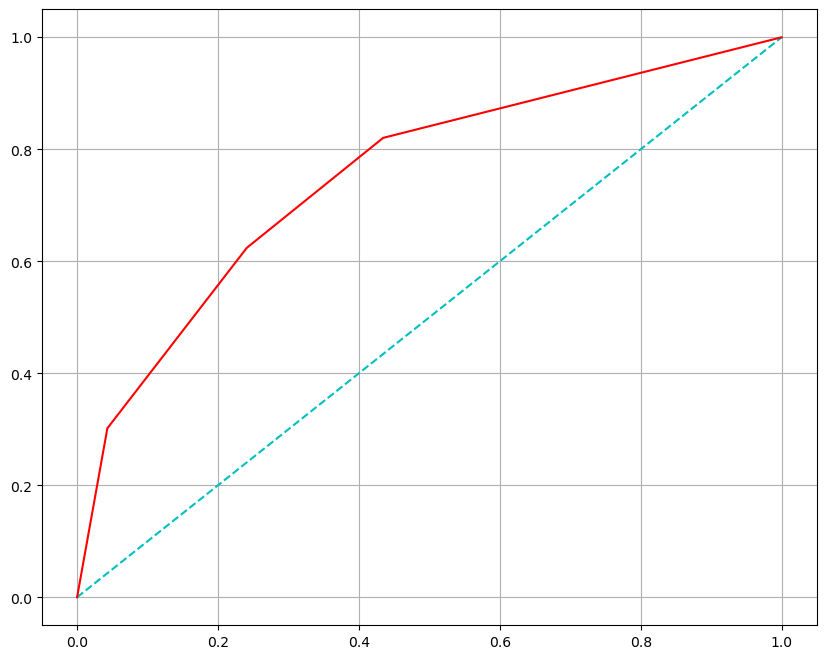

In [14]:
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1], 'c', ls='dashed')
plt.plot(fpr, tpr,'r')
plt.grid()
plt.show()